In [221]:
import pandas as pd
import math
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, ranges, LabelSet
from bokeh.palettes import PuBu
from bokeh.models import ColumnDataSource, ranges, LabelSet
import matplotlib.pyplot as plt
import numpy as np
output_notebook()

Loading BokehJS ...

In [222]:
df = pd.read_csv('data/enero2.csv', header=0, sep=',')

In [223]:
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] =  pd.to_datetime(df['dropoff_datetime'])

In [224]:
def insideManhattan(x):
    lat =  x['pickup_latitude']
    long = x['pickup_longitude']
    if ((lat > 40.680396 and lat <40.882214) and (long > -74.047285 and long < -73.907000)):
        return True
    return False

In [225]:
df = df[df.apply(insideManhattan, axis=1)]
df.dropna(inplace= True)
df.reset_index(inplace=True)

In [226]:
df['pickups_place'] = -1
df['dropoff_place'] = -1
R = 6378137
cellSize = 1000
south_lat = 40.680396
weast_lon = -74.047285

In [227]:
def setPick(x):
    stepLatitude =   cellSize *1.1* 180/(math.pi * R)
    stepLongitude =  cellSize *0.9*180 /( R* math.cos(math.pi*south_lat/180) * math.pi )
    lat =  x['pickup_latitude']
    lon = x['pickup_longitude']
    i = int(math.trunc((lat - south_lat) / stepLatitude))
    j = int(math.trunc((lon - weast_lon) / stepLongitude))
    return '{},{}'.format(i,j)

In [228]:
def setDrop(x):
    stepLatitude =   cellSize *1.1* 180/(math.pi * R)
    stepLongitude =  cellSize *0.9*180 /( R* math.cos(math.pi*south_lat/180) * math.pi )
    lat =  x['dropoff_latitude']
    lon = x['dropoff_longitude']
    i = int(math.trunc((lat - south_lat) / stepLatitude))
    j = int(math.trunc((lon - weast_lon) / stepLongitude))
    return '{},{}'.format(i,j)

In [229]:
df['pickups_place'] = df.apply(setPick, axis=1)

In [230]:
df['dropoff_place'] = df.apply(setDrop, axis=1)

In [231]:
def setDay(day):
    return day.day

In [232]:
def setHour(hour):
    return hour.hour

In [234]:
df['day'] = -1
df['hour'] = -1

In [235]:
df['day'] = df['dropoff_datetime'].apply(setDay)
df['hour'] = df['dropoff_datetime'].apply(setHour)

In [273]:
df_cuatrante_4_5 = df[df['dropoff_place'] == '4,5']
df_cuatrante_4_5.reset_index(inplace=True)

In [244]:
df_cuatrante_7_6 = df[df['dropoff_place'] == '7,6']
df_cuatrante_7_6.reset_index(inplace=True)

In [247]:
df_cuatrante_8_6 = df[df['dropoff_place'] == '8,6']
df_cuatrante_8_6.reset_index(inplace=True)

### Analisis cuadrante 4,5

cantidad de rides agrupados por dia y hora de esos dia

In [274]:
df_rides_agrupados = df_cuatrante_4_5.set_index(['day','hour'])
df_rides_agrupados['num_rides'] = 1
rides_day_hour = df_rides_agrupados.groupby(['day', 'hour'])['num_rides'].sum()
passenger_day_hour = df_rides_agrupados.groupby(['day', 'hour'])['passenger_count'].sum()

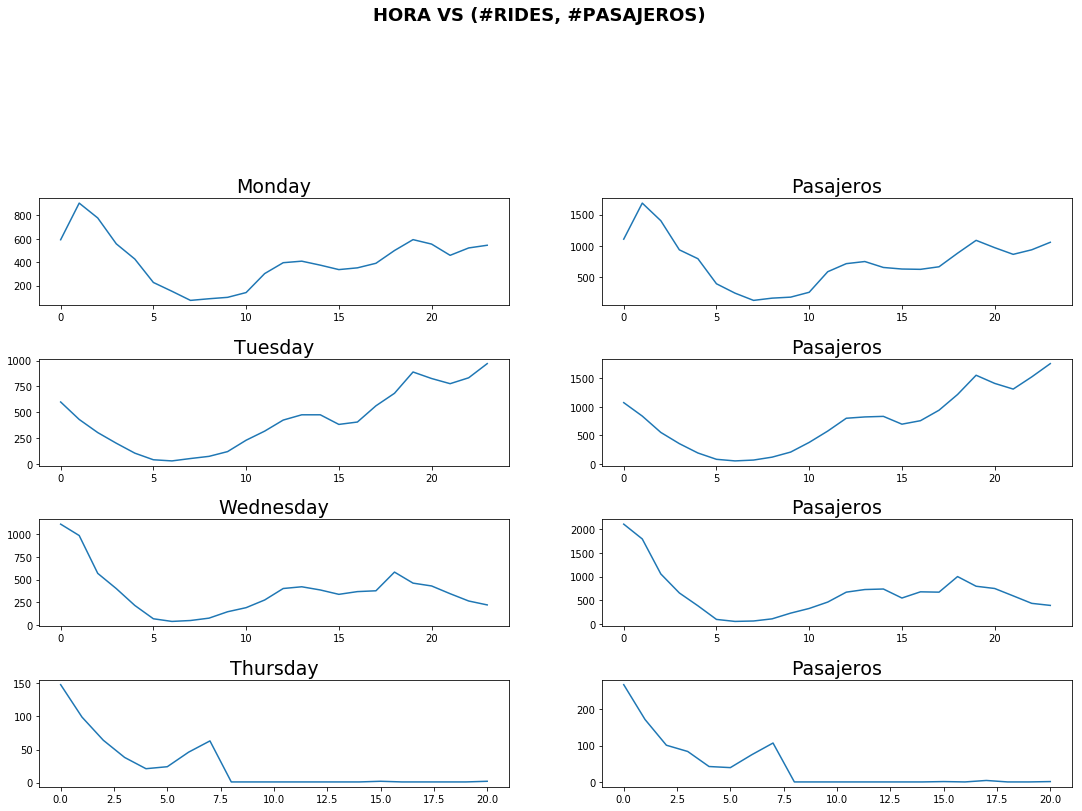

In [275]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HORA VS (#RIDES, #PASAJEROS)', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 20.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
rides = rides_day_hour.index.values.tolist() 
valores = list(rides_day_hour.values)
rides_passenger = passenger_day_hour.index.values.tolist() 
valores_passenger = list(passenger_day_hour.values)
tmp = rides[0][0] ## inicializarlo
x = []
y = []
x1 = []
y1 = []
cont = 0
cont_n = 0
for i,r in enumerate(rides):
    if (tmp != r[0]):
        axis1 = fig.add_subplot(7,2,cont+1)
        axis1.set_title(days[cont_n], fontsize=19) 
        axis1.plot(x,y)
        axis2 = fig.add_subplot(7,2,cont+2)
        axis2.set_title('Pasajeros', fontsize=19)
        axis2.plot(x,y1)
        y = []
        x = []
        y1 = []
        cont = cont + 2
        cont_n = cont_n + 1
#         break
    x.append(r[1])
    y.append(valores[i])
    y1.append(valores_passenger[i])
    if ((len(rides) - 1) == i):
        axis1 = fig.add_subplot(7,2,cont+1)
        axis1.set_title(days[cont_n], fontsize=19) 
        axis1.plot(x,y)
        axis2 = fig.add_subplot(7,2,cont+2)
        axis2.set_title('Pasajeros', fontsize=19)
        axis2.plot(x,y1)
    tmp = r[0]

### Analisis cuadrante 7,6

In [276]:
df_rides_agrupados = df_cuatrante_7_6.set_index(['day','hour'])
df_rides_agrupados['num_rides'] = 1
rides_day_hour = df_rides_agrupados.groupby(['day', 'hour'])['num_rides'].sum()
passenger_day_hour = df_rides_agrupados.groupby(['day', 'hour'])['passenger_count'].sum()

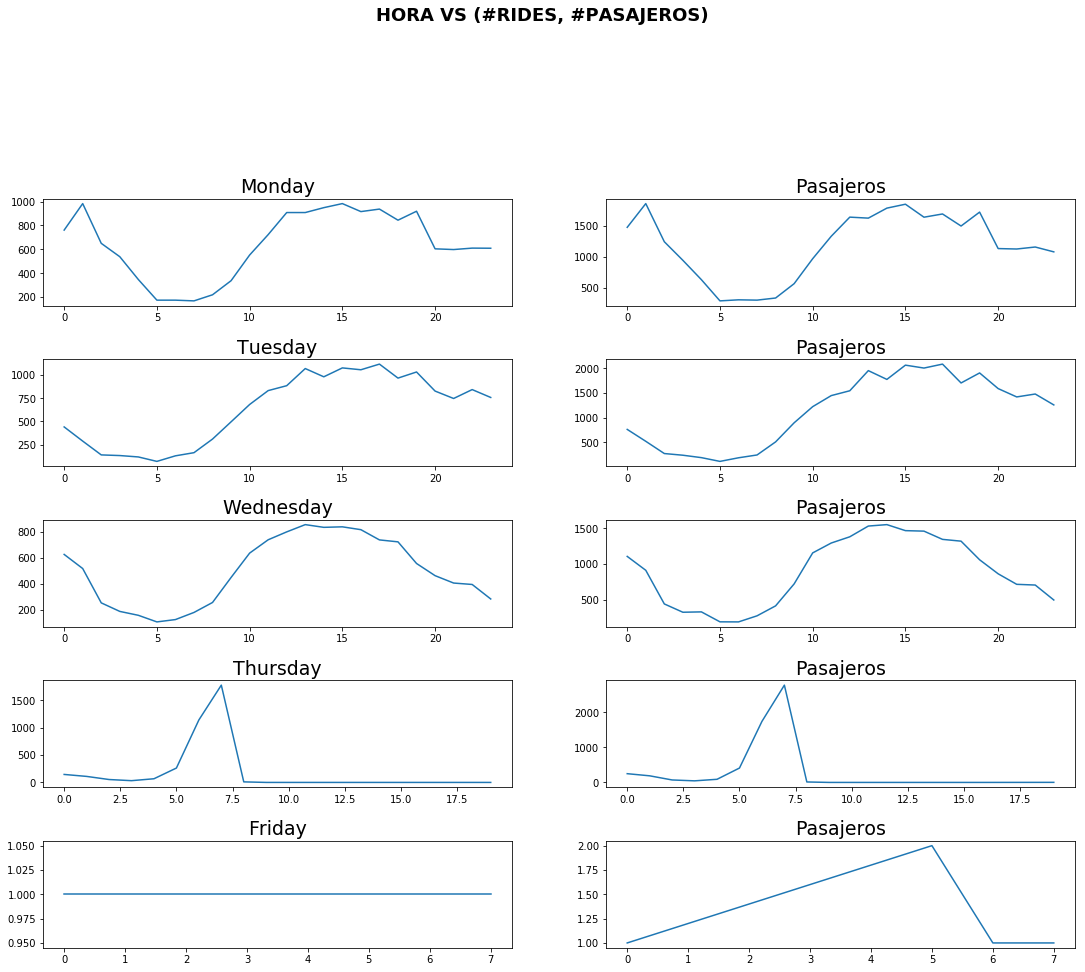

In [277]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HORA VS (#RIDES, #PASAJEROS)', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 20.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
rides = rides_day_hour.index.values.tolist() 
valores = list(rides_day_hour.values)
rides_passenger = passenger_day_hour.index.values.tolist() 
valores_passenger = list(passenger_day_hour.values)
tmp = rides[0][0] ## inicializarlo
x = []
y = []
x1 = []
y1 = []
cont = 0
cont_n = 0
for i,r in enumerate(rides):
    if (tmp != r[0]):
        axis1 = fig.add_subplot(7,2,cont+1)
        axis1.set_title(days[cont_n], fontsize=19) 
        axis1.plot(x,y)
        axis2 = fig.add_subplot(7,2,cont+2)
        axis2.set_title('Pasajeros', fontsize=19)
        axis2.plot(x,y1)
        y = []
        x = []
        y1 = []
        cont = cont + 2
        cont_n = cont_n + 1
#         break
    x.append(r[1])
    y.append(valores[i])
    y1.append(valores_passenger[i])
    if ((len(rides) - 1) == i):
        axis1 = fig.add_subplot(7,2,cont+1)
        axis1.set_title(days[cont_n], fontsize=19) 
        axis1.plot(x,y)
        axis2 = fig.add_subplot(7,2,cont+2)
        axis2.set_title('Pasajeros', fontsize=19)
        axis2.plot(x,y1)
    tmp = r[0]

### Analisis cuadrante 8,6

In [280]:
df_rides_agrupados = df_cuatrante_8_6.set_index(['day','hour'])
df_rides_agrupados['num_rides'] = 1
rides_day_hour = df_rides_agrupados.groupby(['day', 'hour'])['num_rides'].sum()
passenger_day_hour = df_rides_agrupados.groupby(['day', 'hour'])['passenger_count'].sum()

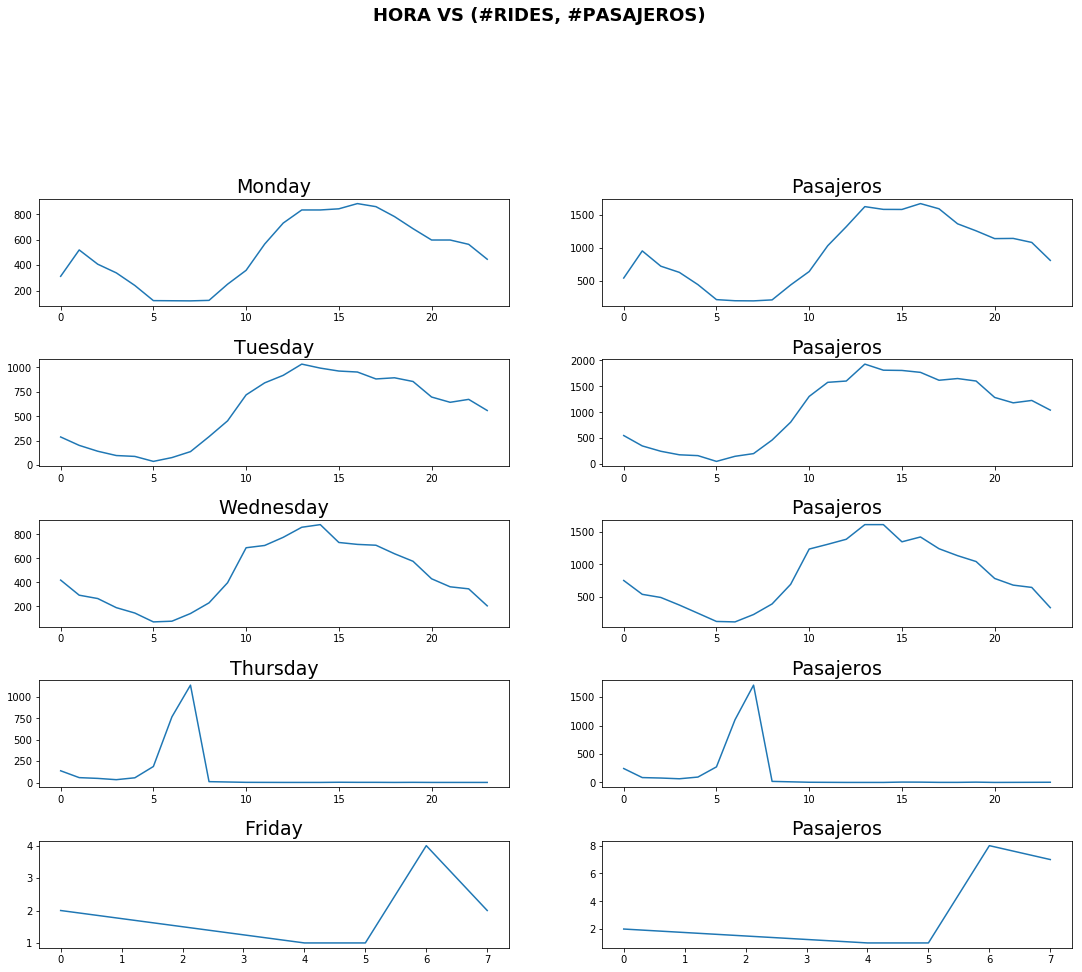

In [281]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HORA VS (#RIDES, #PASAJEROS)', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 20.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
rides = rides_day_hour.index.values.tolist() 
valores = list(rides_day_hour.values)
rides_passenger = passenger_day_hour.index.values.tolist() 
valores_passenger = list(passenger_day_hour.values)
tmp = rides[0][0] ## inicializarlo
x = []
y = []
x1 = []
y1 = []
cont = 0
cont_n = 0
for i,r in enumerate(rides):
    if (tmp != r[0]):
        axis1 = fig.add_subplot(7,2,cont+1)
        axis1.set_title(days[cont_n], fontsize=19) 
        axis1.plot(x,y)
        axis2 = fig.add_subplot(7,2,cont+2)
        axis2.set_title('Pasajeros', fontsize=19)
        axis2.plot(x,y1)
        y = []
        x = []
        y1 = []
        cont = cont + 2
        cont_n = cont_n + 1
    x.append(r[1])
    y.append(valores[i])
    y1.append(valores_passenger[i])
    if ((len(rides) - 1) == i):
        axis1 = fig.add_subplot(7,2,cont+1)
        axis1.set_title(days[cont_n], fontsize=19) 
        axis1.plot(x,y)
        axis2 = fig.add_subplot(7,2,cont + 2)
        axis2.set_title('Pasajeros', fontsize=19)
        axis2.plot(x,y1)
    tmp = r[0]